# Linear Regression
##### Implemented from scratch

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# get training data

dfx = pd.read_csv('./data/linearX.csv')
dfy = pd.read_csv('./data/linearY.csv')

dfx = dfx.values
dfy = dfy.values

x = dfx.reshape((-1,))
y = dfy.reshape((-1,))

print(x.shape, y.shape)

(99,) (99,)


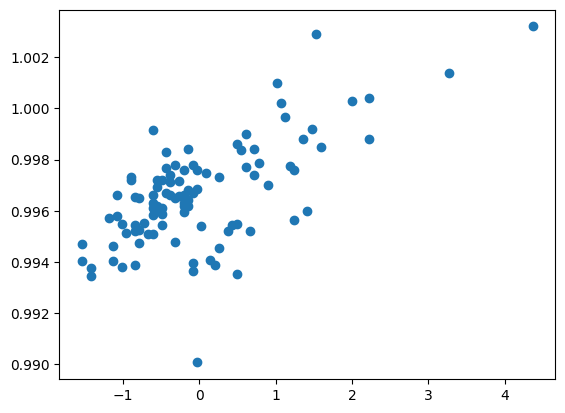

In [ ]:
# normalize x
x = (x-x.mean())/x.std()

plt.scatter(x,y)
plt.show()

In [ ]:
# hypothesis function: calculates hx (y predicted by model) based on current knowledge of m and c
# theta = 2d matrix = [c ,m] where c=y-intersept, m=slope
def hyp(x, theta):
    return theta[0] + theta[1]*x

In [ ]:
# calculates mean squared error between y and predicted y = hx
def error(x, y, theta):
    err = 0
    
    for i in range(x.shape[0]):
        hx = hyp(x[i], theta)
        err += (y-hx)**2
    
    return err

In [12]:
# calculates gradients (partial derivatives): [dJ/dc, dJ/dm]
def gradients(x, y, theta):
    g = np.zeros(2,)
    
    for i in range(x.shape[0]):
        hx = hyp(x[i], theta)
        g[0] += hx-y[i] # dJ/dc
        g[1] += (hx-y[i])*x[i] # dJ/dm
    
    return g

In [13]:
def gradient_descent(x, y, lr=0.001):
    theta = np.array([-2.0, 0.0])
    
    errors = []
    thetas = []
    
    max_it = 100
    it = 0
    while(it < max_it):
        g = gradients(x, y, theta)
        err = error(x, y, theta)
        
        errors.append(err)
        thetas.append(theta)
        
        theta[0] -= lr*g[0]
        theta[1] -= lr*g[1]
        
        it+=1
    
    return theta, errors, thetas

In [14]:
final_theta, errors, thetas = gradient_descent(x, y)

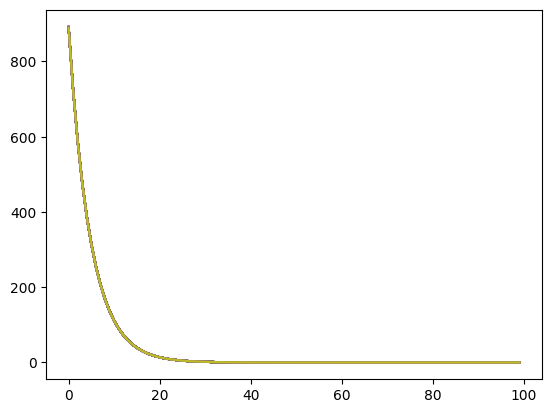

In [15]:
plt.plot(errors)
plt.show()

In [16]:
print(final_theta)

[0.9965452 0.0013579]


In [17]:
# plot derived line
xtest = np.linspace(-2, 6, 10)
print(xtest)

[-2.         -1.11111111 -0.22222222  0.66666667  1.55555556  2.44444444
  3.33333333  4.22222222  5.11111111  6.        ]


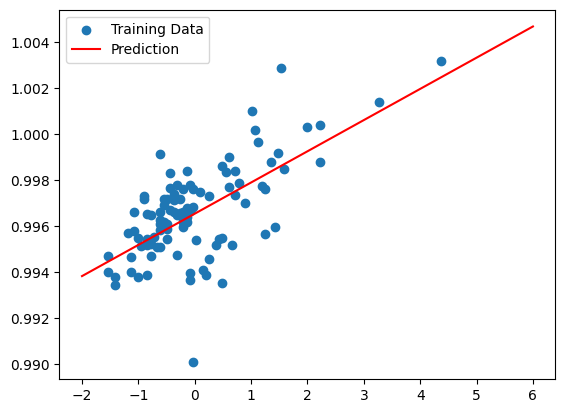

In [20]:
plt.scatter(x, y, label='Training Data')
plt.plot(xtest, hyp(xtest, final_theta), color='red', label='Prediction')
plt.legend()
plt.show()